In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
df=pd.read_csv('/content/chatgpt_reviews.csv')

In [5]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [6]:
df.columns=df.columns.str.lower().str.replace(' ','_')
print(df.columns)


Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [7]:
df['review']=df['review'].fillna('')
df['review_date']=pd.to_datetime(df['review_date'],errors='coerce')
df['ratings']=pd.to_numeric(df['ratings'],errors='coerce')


In [8]:
df.isnull().sum()

,0
review_id,0
review,0
ratings,0
review_date,0


In [ ]:
#semtiment Analysis
#Classifying reviwes into +ve/-ve and neutral

In [17]:
sentiment_counts = df['sentiment'].value_counts()
display(sentiment_counts)

,count
sentiment,
positive,150122
neutral,38450
negative,8155


In [16]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['review'].apply(get_sentiment)

display(df.head())

,review_id,review,ratings,review_date,polarity,sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,positive


In [ ]:
#analyse sentiment of reviews over time

In [24]:
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
display(df.head())

,review_id,review,ratings,review_date,polarity,sentiment,review_year,review_month
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,positive,2024,8
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,positive,2024,8
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,positive,2024,8
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,positive,2024,8
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,positive,2024,8


## Group by time and sentiment

### Subtask:
Group the data by year and month and count the number of reviews for each sentiment category in each time period.


**Reasoning**:
Group the DataFrame by year, month, and sentiment and count the occurrences in each group, then reset the index and rename the count column.



In [25]:
sentiment_over_time = df.groupby(['review_year', 'review_month', 'sentiment']).size().reset_index(name='count')
display(sentiment_over_time)

,review_year,review_month,sentiment,count
0,2023,7,negative,480
1,2023,7,neutral,1809
2,2023,7,positive,5994
3,2023,8,negative,440
4,2023,8,neutral,1439
5,2023,8,positive,4922
6,2023,9,negative,389
7,2023,9,neutral,1433
8,2023,9,positive,5771
9,2023,10,negative,247


## Visualize sentiment over time

### Subtask:
Plot the sentiment counts over time to observe trends.


**Reasoning**:
Plot the sentiment counts over time using line plots.



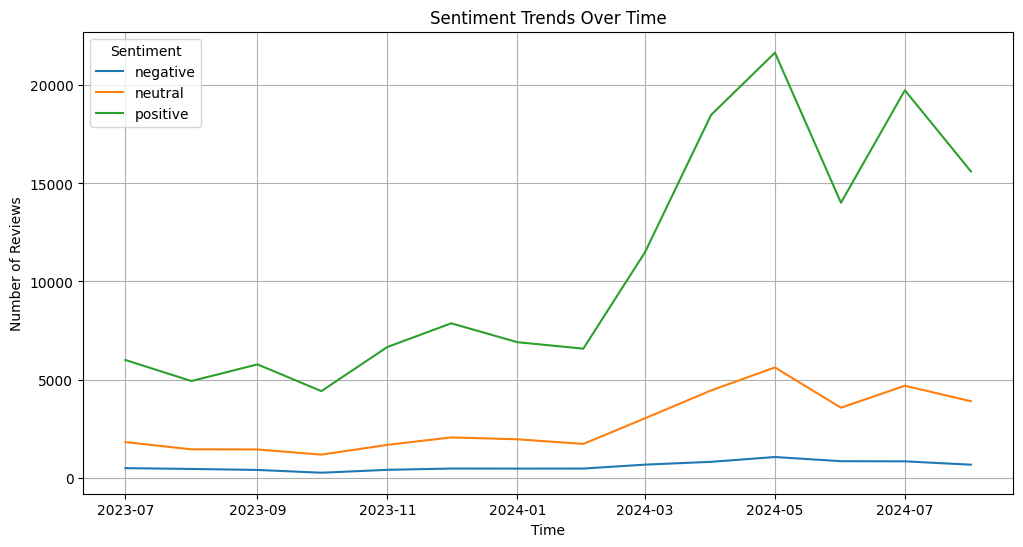

In [27]:
sentiment_over_time['time'] = pd.to_datetime(sentiment_over_time['review_year'].astype(str) + '-' + sentiment_over_time['review_month'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_over_time, x='time', y='count', hue='sentiment')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Sentiment') # Add legend
plt.grid(True) # Add grid lines
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of positive reviews consistently outweighs the number of negative and neutral reviews throughout the observed period (July 2023 to August 2024).
*   There appears to be a general increase in the number of reviews across all sentiment categories over time.
*   The trends for negative and neutral sentiment counts are relatively flat compared to the trend for positive sentiment counts.

### Insights or Next Steps

*   Investigate potential factors contributing to the increase in positive reviews over time.
*   Analyze the content of negative and neutral reviews to identify specific areas for improvement.


In [ ]:
#Analyse relationship between ratings vs sentiment

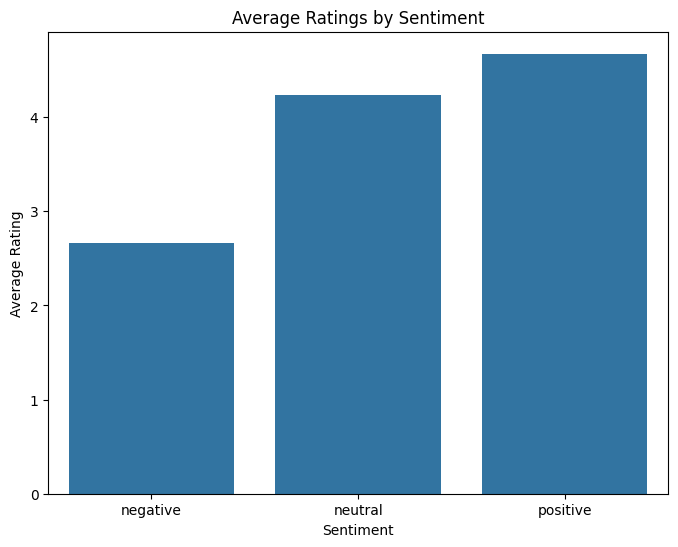

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='ratings', data=average_ratings_by_sentiment)
plt.title('Average Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

In [28]:
average_ratings_by_sentiment = df.groupby('sentiment')['ratings'].mean().reset_index()
display(average_ratings_by_sentiment)

,sentiment,ratings
0,negative,2.667075
1,neutral,4.230689
2,positive,4.673179


In [ ]:
#Analyse review lenght

# Task
Analyze review length.

## Calculate review length

### Subtask:
Add a new column to the dataframe containing the length of each review.


**Reasoning**:
Calculate the length of each review and add it as a new column to the dataframe.



In [30]:
df['review_length'] = df['review'].str.len()
display(df.head())

,review_id,review,ratings,review_date,polarity,sentiment,review_year,review_month,review_length
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,positive,2024,8,4
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,positive,2024,8,4
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,positive,2024,8,8
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,positive,2024,8,8
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,positive,2024,8,368


## Analyze review length

### Subtask:
Calculate descriptive statistics (mean, median, etc.) for the review lengths.


**Reasoning**:
Calculate and display descriptive statistics for the review lengths.



In [31]:
review_length_stats = df['review_length'].describe()
display(review_length_stats)

,review_length
count,196727.000000
mean,46.722682
std,75.183213
min,0.000000
25%,9.000000
50%,18.000000
75%,50.000000
max,500.000000


## Visualize review length distribution

### Subtask:
Create a histogram or density plot to visualize the distribution of review lengths.


**Reasoning**:
Create a histogram to visualize the distribution of review lengths.



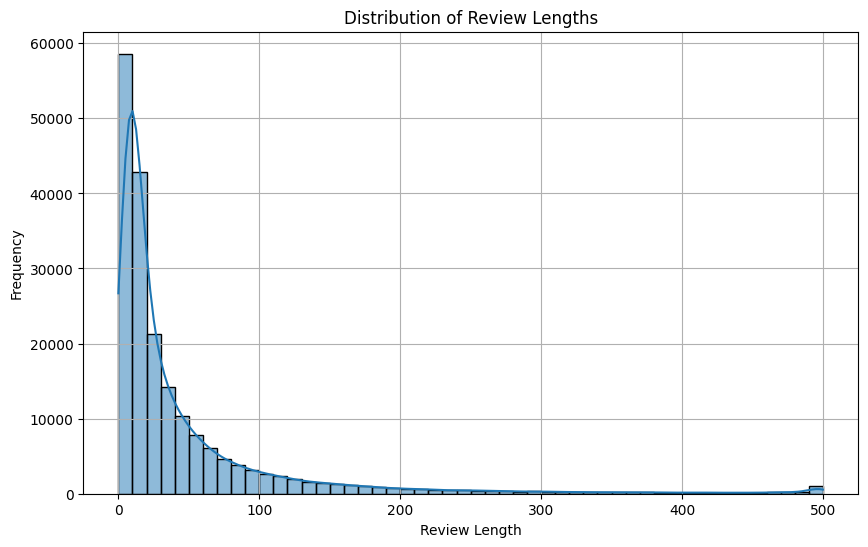

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True) # Add grid lines
plt.show()

## Analyze review length by sentiment/rating

### Subtask:
Explore how review length varies across different sentiment categories or ratings.


**Reasoning**:
Group the DataFrame by sentiment and ratings and calculate the mean review length for each group.



In [33]:
average_review_length_by_sentiment = df.groupby('sentiment')['review_length'].mean().reset_index()
average_review_length_by_rating = df.groupby('ratings')['review_length'].mean().reset_index()
display(average_review_length_by_sentiment)
display(average_review_length_by_rating)

,sentiment,review_length
0,negative,106.901655
1,neutral,29.159714
2,positive,47.951926


,ratings,review_length
0,1,83.811388
1,2,97.972741
2,3,74.546157
3,4,59.586933
4,5,39.116114


In [ ]:
#Analyse what are the common issues for negative reviwes and ratings


# Task
Analyze common issues in negative and low-rated reviews from the DataFrame.

## Filter for negative and low-rated reviews

### Subtask:
Create a subset of the DataFrame containing only reviews classified as negative or those with a rating of 1 or 2.


**Reasoning**:
Filter the DataFrame to include reviews with negative sentiment or low ratings (1 or 2) to focus the analysis on problematic reviews.



In [35]:
negative_reviews = df[df['sentiment'] == 'negative']
low_rated_reviews = df[df['ratings'].isin([1, 2])]
negative_low_rated_reviews = pd.concat([negative_reviews, low_rated_reviews]).drop_duplicates()
display(negative_low_rated_reviews.head())

,review_id,review,ratings,review_date,polarity,sentiment,review_year,review_month,review_length
10,17769ae4-51f6-439c-af12-f59d242e1f6b,I am not very happy with this because chatgpt ...,3,2024-08-23 19:09:14,-0.172527,negative,2024,8,332
119,13fb28dc-df81-4ef0-8842-edd3625fa600,not good,1,2024-08-23 16:41:21,-0.350000,negative,2024,8,8
134,0e0adf90-8e2d-402a-8cc1-c82275b958a8,Too expensive,1,2024-08-23 16:20:49,-0.500000,negative,2024,8,13
176,f86c8ac6-325e-4f3c-83a6-eed16c8e845e,"Correct answer Accuracy 10 %,always provide wr...",1,2024-08-23 15:46:16,-0.500000,negative,2024,8,60
222,edc628fe-24ad-4bb5-8a16-113ec8fec341,"I get a ""something went wrong"" error so I can'...",1,2024-08-23 15:15:03,-0.500000,negative,2024,8,55


## Preprocess the reviews

### Subtask:
Clean the text data by removing punctuation, converting to lowercase, and potentially removing stop words.


**Reasoning**:
Clean the text data by removing punctuation, converting to lowercase, and removing stop words, then display the first few rows.



In [36]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

negative_low_rated_reviews['cleaned_review'] = negative_low_rated_reviews['review'].apply(preprocess_text)
display(negative_low_rated_reviews[['review', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,cleaned_review
10,I am not very happy with this because chatgpt ...,happy chatgpt answers questions ask stops midw...
119,not good,good
134,Too expensive,expensive
176,"Correct answer Accuracy 10 %,always provide wr...",correct answer accuracy 10 always provide wron...
222,"I get a ""something went wrong"" error so I can'...",get something went wrong error cant log


## Identify common words/phrases

### Subtask:
Analyze the preprocessed text to find the most frequent words or n-grams.


**Reasoning**:
Extract cleaned reviews, join them into a single string, split into words, count frequencies, store in a DataFrame, sort, and display the top 20 words.



In [37]:
cleaned_reviews = negative_low_rated_reviews['cleaned_review'].tolist()
all_words = ' '.join(cleaned_reviews).split()
word_counts = Counter(all_words)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df.columns = ['word', 'count']
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

display(word_counts_df.head(20))

,word,count
45,app,5103
22,good,1867
33,cant,1783
1,chatgpt,1358
18,use,1329
135,ai,1228
52,like,1199
7,even,1186
174,time,1135
58,doesnt,1122


## Visualize common issues

### Subtask:
Display the most common words or phrases using a bar plot or word cloud.


**Reasoning**:
Create a bar plot showing the top 20 most frequent words and their counts from the word_counts_df DataFrame.



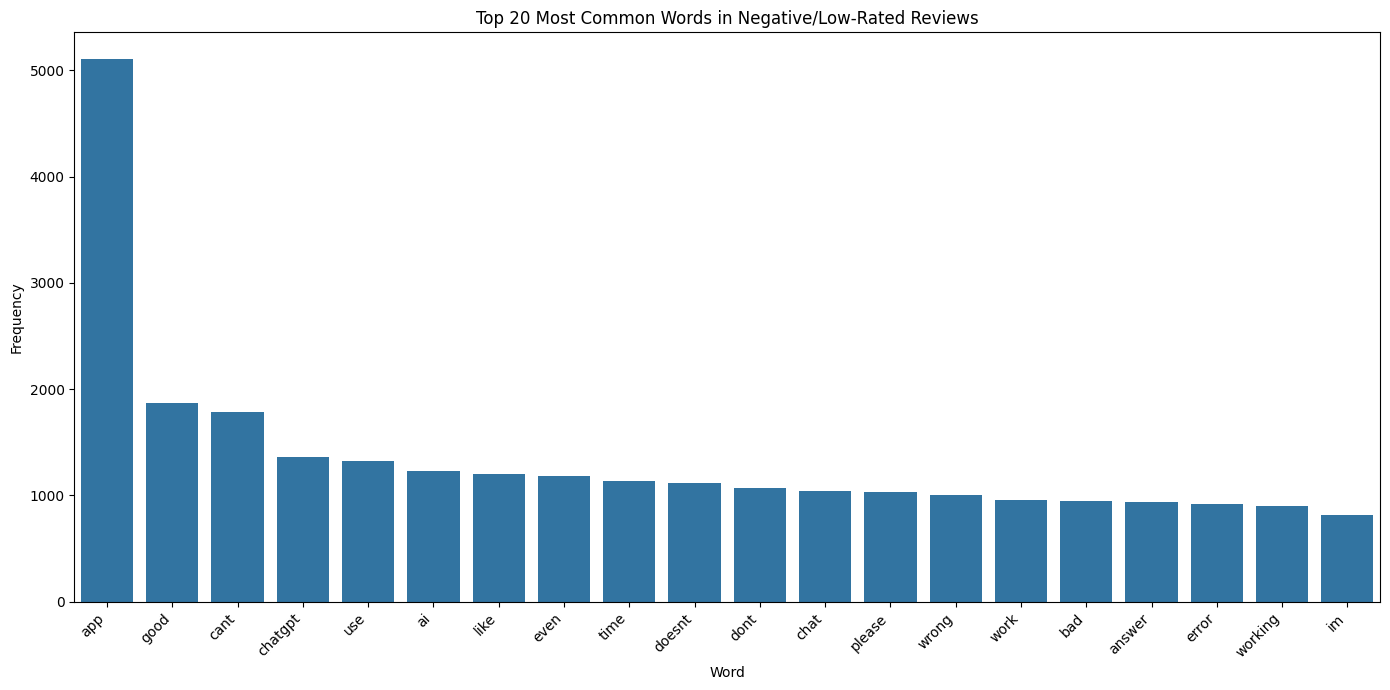

In [38]:
plt.figure(figsize=(14, 7))
sns.barplot(x='word', y='count', data=word_counts_df.head(20))
plt.title('Top 20 Most Common Words in Negative/Low-Rated Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()